In [1]:
!pip install tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from textblob import TextBlob
import os
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.2 MB/s eta 0:00:00


In [ ]:
import tweepy
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

consumerKey = "GMcZh9gkQGGFLiNyR84trQbeH"
consumerSecret = "7YSbfljK2lJ9dH4IwIroBSKpzbMTULuQevHIhdBMgcKfYUB3YN"
accessToken = "1334431300204199936-pnLV16qSXjUlsiNc6hJYztMiWKheBK"
accessTokenSecret = "Pxbr0GTASIoIrP9cR5KFAeD0yGhdTorJ2l0Wfu1uQfKOF"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

def percentage(part, whole):
  return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = pd.DataFrame(columns=['text', 'sentiment_score'])

for tweet in tweets:
    tweet_list = tweet_list.append({'text': tweet.text}, ignore_index=True)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        tweet_list.loc[tweet_list.index[-1], 'sentiment_score'] = 0
        negative += 1
    elif pos > neg:
        tweet_list.loc[tweet_list.index[-1], 'sentiment_score'] = 4
        positive += 1
    else:
        tweet_list.loc[tweet_list.index[-1], 'sentiment_score'] = 2
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

# Number of Tweets (Total, Positive, Negative, Neutral)
print("total number: ", len(tweet_list))
print("positive number: ", len(tweet_list[tweet_list['sentiment_score'] == 4]))
print("negative number: ", len(tweet_list[tweet_list['sentiment_score'] == 0]))
print("neutral number: ", len(tweet_list[tweet_list['sentiment_score'] == 2]))


In [4]:
tweet_list

,text,sentiment_score
0,RT @RCBTweets: The Best of RCB at Chinnaswamy!...,4
1,"RT @mipaltan: Mark (on Surya's form) : ""Surya ...",4
2,RT @CSKFansOfficial: Young or old - every gene...,4
3,RT @mipaltan: 🥶🥶🥶\n\n#OneFamily #MumbaiMeriJaa...,2
4,RT @cricbuzz: Powerful strikers 🔥\n\nDisciplin...,0
...,...,...
1995,RT @ESPNcricinfo: Will this be MS Dhoni's fina...,4
1996,RT @Sportskeeda: 🚨| Presenting you the nominee...,4
1997,RT @CSKFansOfficial: Young or old - every gene...,4
1998,RT @ESPNcricinfo: Will this be MS Dhoni's fina...,4


In [5]:
tweet_list.shape

(2000, 2)

In [6]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             2000 non-null   object
 1   sentiment_score  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
tweet_list['sentiment_score'] = tweet_list['sentiment_score'].astype(int)
tweet_list['sentiment_score'].unique()

array([4, 2, 0])

In [8]:
tweet_list.dtypes

text               object
sentiment_score     int64
dtype: object

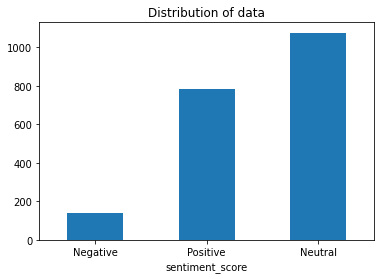

In [9]:
# Plotting the distribution for dataset.
ax = tweet_list.groupby('sentiment_score').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(tweet_list['text']), list(tweet_list['sentiment_score'])

<Axes: xlabel='sentiment_score', ylabel='count'>

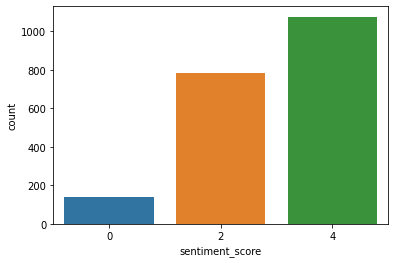

In [10]:
import seaborn as sns
sns.countplot(x='sentiment_score', data=tweet_list)

In [11]:
data=tweet_list[['text','sentiment_score']]
data_pos = tweet_list[tweet_list['sentiment_score'] == 4]
data_neg = tweet_list[tweet_list['sentiment_score'] == 0]
data_neu = tweet_list[tweet_list['sentiment_score'] == 2]

In [12]:
dataset = pd.concat([data_pos, data_neg, data_neu])

In [13]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

1984    rt @rcbtweets: mystery with the ball, blitz wi...
1985    jiocinema unveils host of cricket greats for t...
1986    rt @rc_msd_: 2 days to go #ipl2023 \n\n@msdhon...
1993    rt @mipaltan: 🥶🥶🥶\n\n#onefamily #mumbaimerijaa...
1994    rt @mipaltan: 𝔻𝔹 🤝 ℕ𝕠 𝕝𝕠𝕠𝕜 𝕤𝕙𝕠𝕥 🤩\n\n#onefamil...
Name: text, dtype: object

In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [15]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0     rt @rcbtweets: best rcb chinnaswamy! 🏟 12th ma...
1     rt @mipaltan: mark (on surya's form) : "surya ...
2     rt @cskfansofficial: young old - every generat...
9     rt @delhicapitals: hum saath saath hain 🫂 📷| b...
15    rt @mipaltan: ye surya भाऊ ka style hai! 😎 #on...
Name: text, dtype: object

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

1984    rt rcbtweets mystery ball blitz bat dapper new...
1985    jiocinema unveils host cricket greats tata ipl...
1986    rt rcmsd 2 days go ipl2023 msdhoni 🙇 httpstcox...
1993    rt mipaltan 🥶🥶🥶 onefamily mumbaimerijaan mumba...
1994    rt mipaltan 𝔻𝔹 🤝 ℕ𝕠 𝕝𝕠𝕠𝕜 𝕤𝕙𝕠𝕥 🤩 onefamily mumb...
Name: text, dtype: object

In [17]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

1984    rt rcbtweets mystery ball blitz bat dapper new...
1985    jiocinema unveils host cricket greats tata ipl...
1986    rt rcmsd 2 days go ipl2023 msdhoni 🙇 httpstcox...
1993    rt mipaltan 🥶🥶🥶 onefamily mumbaimerijaan mumba...
1994    rt mipaltan 𝔻𝔹 🤝 ℕ𝕠 𝕝𝕠𝕠𝕜 𝕤𝕙𝕠𝕥 🤩 onefamily mumb...
Name: text, dtype: object

In [18]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

1984    rt rcbtweets mystery ball blitz bat dapper new...
1985    jiocinema unveils host cricket greats tata ipl...
1986    rt rcmsd 2 days go ipl2023 msdhoni 🙇 httpstcox...
1993    rt mipaltan 🥶🥶🥶 onefamily mumbaimerijaan mumba...
1994    rt mipaltan 𝔻𝔹 🤝 ℕ𝕠 𝕝𝕠𝕠𝕜 𝕤𝕙𝕠𝕥 🤩 onefamily mumb...
Name: text, dtype: object

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

1984    rt rcbtweets mystery ball blitz bat dapper new...
1985    jiocinema unveils host cricket greats tata ipl...
1986      rt rcmsd  days go ipl msdhoni 🙇 httpstcoxukislf
1993    rt mipaltan 🥶🥶🥶 onefamily mumbaimerijaan mumba...
1994    rt mipaltan 𝔻𝔹 🤝 ℕ𝕠 𝕝𝕠𝕠𝕜 𝕤𝕙𝕠𝕥 🤩 onefamily mumb...
Name: text, dtype: object

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0     [w, w, w]
1           [w]
2            []
9            []
15           []
Name: text, dtype: object

In [21]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0     [w, w, w]
1           [w]
2            []
9            []
15           []
Name: text, dtype: object

In [22]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0     [w, w, w]
1           [w]
2            []
9            []
15           []
Name: text, dtype: object

In [23]:
X=data.text
y=data.sentiment_score

In [24]:
# Separating the 75% data for training data and 25% for testing data
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =26105111)

In [25]:
X_train

641     RT @SunRisers: ABCDEHIJKLMNOPQRSTUVWXYZ 🤔\n\nF...
1733    RT @brb_memes7: #ipl2023 \nDhoni ko troll karn...
1072    Rajasthan Royals  predicted playing 11 -\n1. J...
1457    RT @sunnewstamil: #IPLUpdate | ஐபிஎல் தொடரின் ...
181     RT @CricAspect: Batting performance of domesti...
                              ...                        
1740    RT @Ayyappan_1504: #IPL2023 #CSKvsLSG \n\n2️⃣ ...
833     RT @RCBTweets: Behind the Scenes with Virat Ko...
413     RT @mipaltan: 🥶🥶🥶\n\n#OneFamily #MumbaiMeriJaa...
1198    उमेश यादव आईपीएल 2023 में केकेआर का हिस्सा हैं...
1780    RT @RCBTweets: 🔝 lad Topley envisioning toppli...
Name: text, Length: 1500, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [27]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [28]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Neutral', 'Positive']
    group_names = ['True Neg', 'False Neut', 'False Neg', 'False Neut', 'True Pos', 'False Neg', 'False Pos', 'False Pos', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(3, 3)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size':14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)


In [ ]:
#Implementing Naive Bayes and SVM

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        26
           2       0.83      0.93      0.88       199
           4       0.91      0.90      0.90       275

    accuracy                           0.87       500
   macro avg       0.91      0.66      0.68       500
weighted avg       0.88      0.87      0.86       500



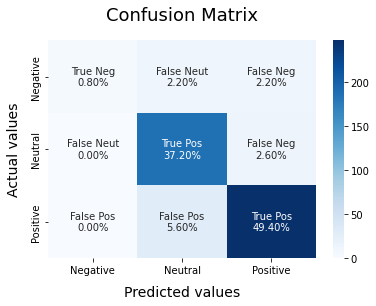

In [29]:
#NAIVE BAYES ALGO
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        26
           2       0.89      0.92      0.91       199
           4       0.93      0.94      0.94       275

    accuracy                           0.92       500
   macro avg       0.94      0.81      0.86       500
weighted avg       0.92      0.92      0.91       500



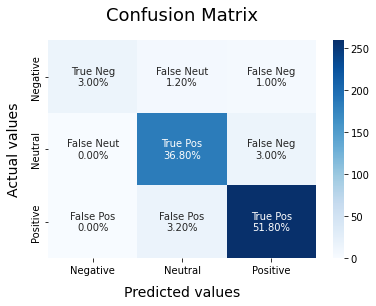

In [31]:
#SVM
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)